# Heart Attack Analysis

Justin Lee

This notebook is prepared for the Ministry of Health and Family Welfare (MoHFW). The MoHFW aims to understand how they can use ML models to identify high-risk characteristics to heart attacks and allocate medical resources accordingly. This can be used for public awareness campaigns and public health initaitives targeting key risk factors.

### Business Understanding

The dataset is based on Indian cardiovascular health statistics, medical research reports, and national surveys, incorporating data from:

Indian Council of Medical Research (ICMR) – Reports on heart disease prevalence in India Ministry of Health & Family Welfare, Government of India – National health statistics World Health Organization (WHO) – India Reports – Cardiovascular disease risk factors National Family Health Survey (NFHS-5) – Demographic and health-related indicators Global Burden of Disease (GBD) Study – India-specific cardiovascular mortality rates Indian Heart Journal & AIIMS Research – Clinical insights on CVD trends in India.

This dataset consists of 10,000 records with each corresponding to a patient ID and their associated health characteristics, conditions, lifestyle choices and other related metrics culminating in assessing whether or not the patient is at risk for a heart attack. We also have no null values in our dataset.

### Data Understanding

In [1]:
# Import relevant libraries
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
# Load in dataframe
df = pd.read_csv('heart_attack_prediction_india.csv')

df.head()

,Patient_ID,State_Name,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
0,1,Rajasthan,42,Female,0,0,1,1,0,0,...,119,1,0,4,0,0,157,611025,0,0
1,2,Himachal Pradesh,26,Male,0,0,0,0,1,1,...,115,0,0,7,0,0,331,174527,0,0
2,3,Assam,78,Male,0,0,1,0,0,1,...,117,0,1,10,1,0,186,1760112,1,0
3,4,Odisha,58,Male,1,0,1,0,0,1,...,65,0,0,1,1,1,324,1398213,0,0
4,5,Karnataka,22,Male,0,0,0,0,0,1,...,109,0,0,9,0,0,209,97987,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Patient_ID               10000 non-null  int64 
 1   State_Name               10000 non-null  object
 2   Age                      10000 non-null  int64 
 3   Gender                   10000 non-null  object
 4   Diabetes                 10000 non-null  int64 
 5   Hypertension             10000 non-null  int64 
 6   Obesity                  10000 non-null  int64 
 7   Smoking                  10000 non-null  int64 
 8   Alcohol_Consumption      10000 non-null  int64 
 9   Physical_Activity        10000 non-null  int64 
 10  Diet_Score               10000 non-null  int64 
 11  Cholesterol_Level        10000 non-null  int64 
 12  Triglyceride_Level       10000 non-null  int64 
 13  LDL_Level                10000 non-null  int64 
 14  HDL_Level                10000 non-null

In [4]:
df.describe()

,Patient_ID,Age,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Emergency_Response_Time,Annual_Income,Health_Insurance,Heart_Attack_Risk
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,5000.50000,49.394900,0.092900,0.24690,0.303700,0.301400,0.352800,0.595800,5.021700,224.753000,...,89.312000,0.403600,0.311300,5.518800,0.311000,0.152500,206.383400,1.022062e+06,0.344700,0.300700
std,2886.89568,17.280301,0.290307,0.43123,0.459878,0.458889,0.477865,0.490761,3.156394,43.359172,...,17.396486,0.490644,0.463048,2.866264,0.462926,0.359523,112.391711,5.605978e+05,0.475294,0.458585
min,1.00000,20.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,...,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.035300e+04,0.000000,0.000000
25%,2500.75000,35.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,187.000000,...,74.000000,0.000000,0.000000,3.000000,0.000000,0.000000,110.000000,5.357838e+05,0.000000,0.000000
50%,5000.50000,49.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,5.000000,226.000000,...,89.000000,0.000000,0.000000,6.000000,0.000000,0.000000,206.000000,1.021383e+06,0.000000,0.000000
75%,7500.25000,64.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,8.000000,262.000000,...,104.000000,1.000000,1.000000,8.000000,1.000000,0.000000,304.000000,1.501670e+06,1.000000,1.000000
max,10000.00000,79.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,10.000000,299.000000,...,119.000000,1.000000,1.000000,10.000000,1.000000,1.000000,399.000000,1.999714e+06,1.000000,1.000000


In [5]:
# Check how many null values there are
df.isnull().sum()

Patient_ID                 0
State_Name                 0
Age                        0
Gender                     0
Diabetes                   0
Hypertension               0
Obesity                    0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity          0
Diet_Score                 0
Cholesterol_Level          0
Triglyceride_Level         0
LDL_Level                  0
HDL_Level                  0
Systolic_BP                0
Diastolic_BP               0
Air_Pollution_Exposure     0
Family_History             0
Stress_Level               0
Healthcare_Access          0
Heart_Attack_History       0
Emergency_Response_Time    0
Annual_Income              0
Health_Insurance           0
Heart_Attack_Risk          0
dtype: int64

In [6]:
# Check class imbalance in our target column
df['Heart_Attack_Risk'].value_counts()

0    6993
1    3007
Name: Heart_Attack_Risk, dtype: int64

Our target variable is imbalanced (with roughly a 70/30 split). We will prepare our data to handle this class imbalance and then proceed with random under sampling on a logistic regression model.

### Data Preparation

In order to prepare our data for analysis we must do the following steps. We will drop any non-informative columns such as patient ID, state name and emergency response time and then assign heart attack risk as our target variable. We'll also label encode gender to be binary with female being 0 and male being 1. After we'll split our data using train test split with training making up 70% and test data making up 30%. We'll then have to standard scale our numeric columns (non-binary) to make other features on the same evaluation scale for analysis.

In [7]:
# Define features (X) and the target variable (y)
# Dropping non-informative columns
X = df.drop(columns=["Heart_Attack_Risk", "Patient_ID", "State_Name", "Emergency_Response_Time"])
y = df["Heart_Attack_Risk"]

In [8]:
# 'Gender' is our only categorical variable left. We'll encode 'Gender' as binary (0 = Female, 1 = Male)
label_encoder = LabelEncoder()
X["Gender"] = label_encoder.fit_transform(X["Gender"])

# Verify encoding
X["Gender"].value_counts()

1    5516
0    4484
Name: Gender, dtype: int64

In [9]:
# Splitting data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Check the shape of the datasets
X_train.shape, X_test.shape

((7000, 22), (3000, 22))

In [10]:
# Scale the numeric (non-binary) columns here
numeric_columns = [
    "Age", "Diet_Score", "Cholesterol_Level", "Triglyceride_Level", "LDL_Level", "HDL_Level",
    "Systolic_BP", "Diastolic_BP", "Stress_Level", "Annual_Income"]

# Initialize StandardScaler
scaler = StandardScaler()

# Copy original data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Apply scaling only to numeric features
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Check scaled data
X_train_scaled.head()

,Age,Gender,Diabetes,Hypertension,Obesity,Smoking,Alcohol_Consumption,Physical_Activity,Diet_Score,Cholesterol_Level,...,HDL_Level,Systolic_BP,Diastolic_BP,Air_Pollution_Exposure,Family_History,Stress_Level,Healthcare_Access,Heart_Attack_History,Annual_Income,Health_Insurance
5728,-0.252792,0,0,0,0,0,1,1,1.571189,0.379859,...,1.142482,-1.696606,1.474493,0,1,-1.221158,1,0,-1.311476,0
2143,0.731703,0,0,0,0,0,1,1,-0.967960,0.149250,...,-0.698375,0.088630,1.244345,0,0,0.518454,0,1,-0.933952,0
1622,-0.310703,1,1,0,0,0,1,1,0.619008,-0.196663,...,-1.388696,0.049820,1.301882,0,0,-1.569081,1,0,-0.483346,1
2090,-0.773994,0,0,0,0,1,1,0,-0.015779,-0.381151,...,1.027428,1.330533,0.093605,1,0,-0.177391,0,0,-0.186493,0
1282,1.021260,0,0,0,1,1,0,1,1.571189,-1.511135,...,-0.583321,-0.648750,0.496364,1,0,0.170532,0,0,-0.193740,0


### Baseline Model - Logistic Regression

We'll establish a starting point for evaluating heart attack risk through an initial logistic regression model. Logistic regression is widely used because it is simple and interpretable. This is an ideal first model for our binary classification analysis.

In [11]:
# Initialize and train logistic regression model
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = baseline_model.predict(X_test_scaled)

### Baseline Model - Evaluation

In [12]:
# Print evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6993333333333334
Confusion Matrix:
 [[2098    0]
 [ 902    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82      2098
           1       0.00      0.00      0.00       902

    accuracy                           0.70      3000
   macro avg       0.35      0.50      0.41      3000
weighted avg       0.49      0.70      0.58      3000



/Users/justinlee/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy is around 70% but a major limitation is that it is never predicting class 1 (high risk of heart attack cases). Precision, recall and F1-score for this class is 0.

Our model is classifying every test sample as low risk which makes it useless for public health decision-making. While our target class is not extremely unbalanced, logistic regression is still favoring the majority class. 

We have 469 correctly predicted high-risk cases, 419 correctly predicted low-risk cases, 484 wrongly predicted high-risk cases that were actually low-risk, and 433 wrongly predicted low-risk cases that were actually high-risk.

We will proceed with random undersampling our model in hopes to yield better results from a more balanced class.

### Resampled Logistic Regression Model

Since our dataset is imbalanced in the target class we'll iterate on our baseline logistic regression model with random under sampling. The imbalance caused our model to favor predicting class 0 (low-risk patients). Random undersampling balances the dataset by reducing the number of the majority class and ensures our model learns patterns from both classes equally.

In [13]:
# Apply Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Check class distribution after undersampling
print(y_resampled.value_counts())

1    3007
0    3007
Name: Heart_Attack_Risk, dtype: int64


In [14]:
# Split undersampled data
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Verify the new class distribution
print("New class balance in training set:\n", y_train.value_counts(normalize=True))

New class balance in training set:
 1    0.500119
0    0.499881
Name: Heart_Attack_Risk, dtype: float64


In [15]:
# Initialize and train the random undersampled model
rus_model = LogisticRegression(random_state=42)
rus_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = rus_model.predict(X_test_scaled)

### Resampled Logistic Regression Evaluation

In [16]:
# Print evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.4930747922437673
Confusion Matrix:
 [[419 484]
 [431 471]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.46      0.48       903
           1       0.49      0.52      0.51       902

    accuracy                           0.49      1805
   macro avg       0.49      0.49      0.49      1805
weighted avg       0.49      0.49      0.49      1805



This is slightly worse than random guessing (50%) which means that the model struggles to find meaningful patterns after undersampling.

However, our model is now at least predicting both class 0 and 1. Our model had 419 true negatives (correctly predicted no heart attack risk), 433 false negatives of high-risk patients misclassified as low-risk, 484 false positives of low-risk patients wrongly classified as high-risk, and 469 true positives of correctly predicted high-risk patients.

Our recall was 0.46 for class 0 and 0.52 for class 1. For class 1, recall of 0.52 means that the model misses 48% of actual heart attack cases (false negatives).

Precision was 0.49 for both classes, meaning the model isn't precise in predicting correct positives. This leads to many false positives.

F1-score was 0.49 for both classes, meaning the balance between recall and precision isn't that great. Our model isn't very useful for making predictions yet.

### Decision Tree Model

We will iterate upon our undersampled model rather than our baseline model because it yielded a better F1-score. We will next use a decision tree model because it provides clear, interpretable rules for risk assessment and captures more complext relationships between our medical, socioeconomic and behavioral factors. F1-score is vital to build off of because it provides us information on creating a healthy balance of cases we predicted as high-risk actually being high-risk and cases of actual high-risk that were correctly identified as high-risk. Accuracy alone is misleading in imbalanced datasets.

We'll proceed with a decision tree classifier model to account for an extra layer of complexity among our features. The decision tree will make predictions by splitting data into branches based on feature values.

In [17]:
# Initialize the decision tree classifier
dtc = DecisionTreeClassifier(random_state = 42)

# Train model on undersampled data
dtc.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# Make predictions on the test set
y_pred_dtc = dtc.predict(X_test_scaled)

### Decision Tree Evaluation

In [19]:
# Print evaluation results
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtc))
print("Classification Report:\n", classification_report(y_test, y_pred_dtc))

Accuracy: 0.49584487534626037
Confusion Matrix:
 [[456 447]
 [463 439]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50       903
           1       0.50      0.49      0.49       902

    accuracy                           0.50      1805
   macro avg       0.50      0.50      0.50      1805
weighted avg       0.50      0.50      0.50      1805



Our accuracy improved slightly from our undersampled evaluation to 50%. Our decision tree also predicted both class 0 and 1 pretty evenly. We had 431 false positives, meaning many low-risk individuals are misclassified as high-risk. We also had 454 false negatives of actual high-risk patients that are missed.

Our model isn't very precise at 0.50 for both classes, meaning if the model predicts someone is at risk of a heart attack it's only correct 50% of the time. Our recall also sits at 0.49 for class 1, meaning it only detects about half of the actual high-risk patients. Our F1-score remained roughly the same as our undersampled evaluation. This still reflects poor balance between both precision and recall.

### Conclusion & Next Steps

When looking at precision, recall and F1-score, these metrics are all resilient to class imbalance. Of these three metrics we will use recall as our north star metric because it helps us to best reduce the error of missing high risk patients.

Before selecting which model is better for our analysis, let us look into feature importance/magnitude of importance of features for each model. This will provide us extra insight into leading factors to heart attack risk.

,Decision Tree Importance,Logistic Regression Coefficients
Annual_Income,0.134740,0.021173
Triglyceride_Level,0.115076,0.029656
LDL_Level,0.094492,0.029910
Systolic_BP,0.092984,0.014322
Diastolic_BP,0.092788,0.038685
HDL_Level,0.088960,0.021798
Age,0.085011,0.058182
Cholesterol_Level,0.067534,0.005907
Diet_Score,0.059141,0.031542
Stress_Level,0.043682,0.031003


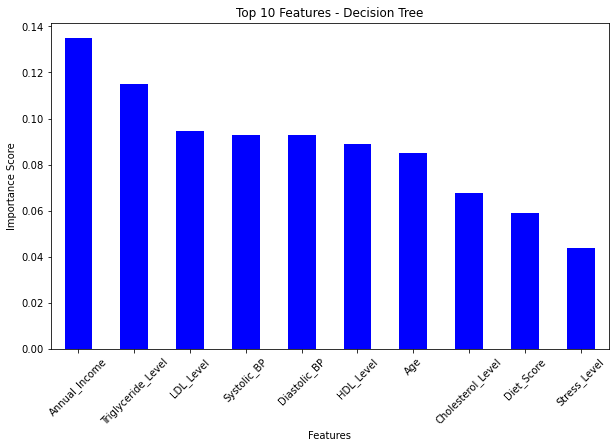

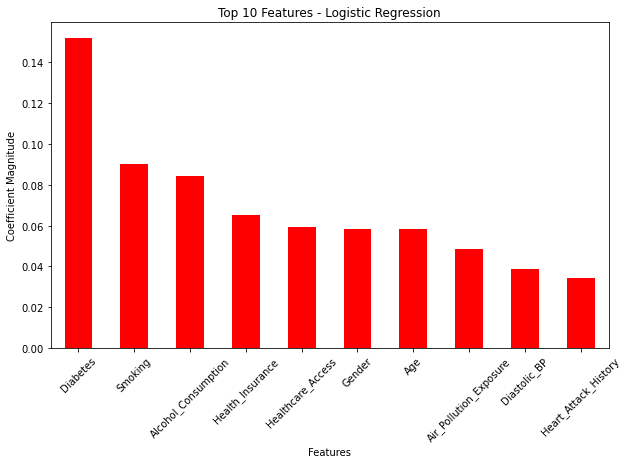

In [20]:
# Extract feature importance from decision tree
feature_importance_dt = pd.Series(dtc.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)

# Extract coefficients and sort them by absolute value to measure magnitude of impact 
feature_importance_lr = pd.Series(rus_model.coef_[0], index=X_train_scaled.columns).abs().sort_values(ascending=False)

# Combine both into its own dataframe for comparison
feature_comparison = pd.DataFrame({
    "Decision Tree Importance": feature_importance_dt,
    "Logistic Regression Coefficients": feature_importance_lr
}).sort_values(by="Decision Tree Importance", ascending=False)

# Display feature comparison DataFrame
display(feature_comparison)

# Plot feature importance for Decision Tree
plt.figure(figsize=(10, 6))
feature_importance_dt[:10].plot(kind="bar", color="blue")
plt.title("Top 10 Features - Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()

# Plot feature importance for Logistic Regression
plt.figure(figsize=(10, 6))
feature_importance_lr[:10].plot(kind="bar", color="red")
plt.title("Top 10 Features - Logistic Regression")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.xticks(rotation=45)
plt.show()

These charts show the magnitude of importance/impact each feature has on heart attack risk. The decision tree model suggests that annual income and biological measures such as triglyceride level, LDL level and systolic BP are major predictors of heart attack outcomes. Our logistic regression model suggests that diabetes, smoking and alcohol consumption are strong contributors to heart attack.

Given that the MoHFW aims to develop public health strategies to prevent heart attacks, I'd recommend pursuing public health initiatives based on findings from our decision tree model. Our decision tree model captures non-linear relationships (as opposed to our linear regression model that assumes simple linear relationships between features and heart attack risk) and highlights larger scale public health policy and resource allocation.

Low-income populations was the biggest predictor for heart attack risk from our decision tree model but a limitation of this dataset is that we don't know what the binary 0 and 1 means in terms of socioeconomic tier. To better support this as a major indicator to heart attack risk, it'd be helpful to gather additional data to know the patient's health insurance  type and coverage level, out-of-pocket healthcare costs, and employment type/income tiers. With more flushed out socioeconomic and healthcare data, we can move from broad public health suggestions to targeted, evidence-based policy interventions.